# Forest Cover Data Exploration

## Motivation

The purpose of this project is to provide a simple overview of how Python data visualization tools can be used to understand a complex, large dataset.
The dataset in question contains information about features of forested areas. The data includes numerical variables (distance to XXX feature) as well as categorical variables (soil type, tree cover type).   

Through 7 data visualization tenchniques, we will drive understanding of this data and the trends that underlie it.



## Setup  
1. Import necessary packages
2. Gain a high level understanding of data  
3. Set up data for manipulation

In [1]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import packages
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/forest-cover-type-prediction/train.csv.zip
/kaggle/input/forest-cover-type-prediction/sampleSubmission.csv
/kaggle/input/forest-cover-type-prediction/sampleSubmission.csv.zip
/kaggle/input/forest-cover-type-prediction/test3.csv
/kaggle/input/forest-cover-type-prediction/train.csv
/kaggle/input/forest-cover-type-prediction/test.csv
/kaggle/input/forest-cover-type-prediction/test.csv.zip


In [3]:
#import data
training = pd.read_csv('/kaggle/input/forest-cover-type-prediction/train.csv')
test = pd.read_csv('/kaggle/input/forest-cover-type-prediction/test.csv')

In [4]:
#Look at training data - 56 populated columns
training.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,6,300,-15,67,230,237,140,...,0,0,0,0,0,0,0,0,0,2
6,7,2606,45,7,270,5,633,222,225,138,...,0,0,0,0,0,0,0,0,0,5
7,8,2605,49,4,234,7,573,222,230,144,...,0,0,0,0,0,0,0,0,0,5
8,9,2617,45,9,240,56,666,223,221,133,...,0,0,0,0,0,0,0,0,0,5
9,10,2612,59,10,247,11,636,228,219,124,...,0,0,0,0,0,0,0,0,0,5


In [5]:
training.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
# %matplotlib inline embeds a static image of what we are trying to show in our notebook
#.columns shows the columns we are using
%matplotlib inline
training.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

## Exploratory Plan

**1. Explore by:**    

    1. Making histograms to understand distributions for all numeric variables   
    
    2. Creating and visualize correlation matrix to understand correlations between variables  
    
    3. Creating a pivot table to view average values numerically
    
    4. Vizualizing average numerical values using barplots   
    
    5. Using violin plots to see the relationship between categorical variables (cover type) and other forest attributes.    
    
    6. Making scatterplots to visualize horizontal distance to hydrology by elevation by cover type    
    
    7. Creating countplots relate categorical variables:    
        a. Cover type by wilderness area  
        b. Cover type by soil type

## Histograms  
Understand distributions for all numeric variables   

In [7]:
# .describe() shows us the measures of central tendency for our data
#Help us think about the data differntly and help us make associations
training.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
# look at numeric values separately 
df_num = training [['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways', 
                    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']]

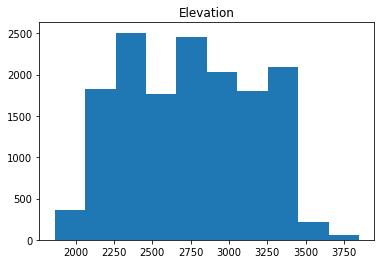

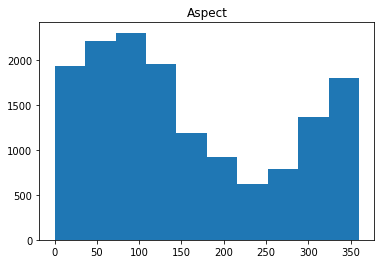

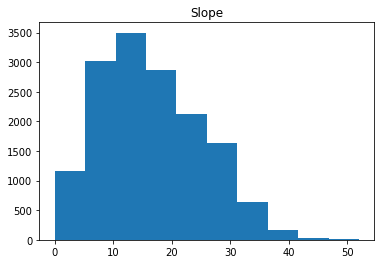

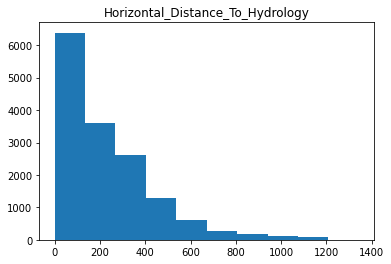

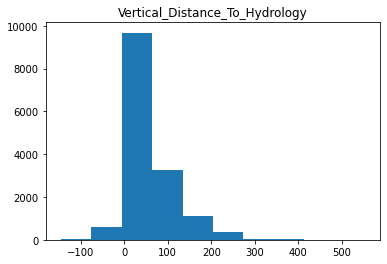

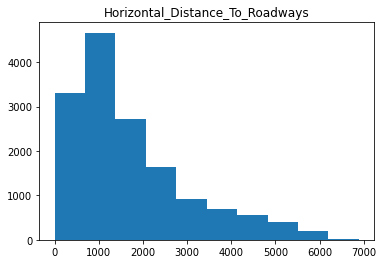

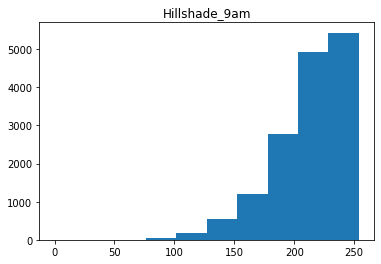

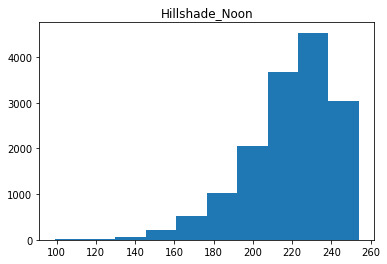

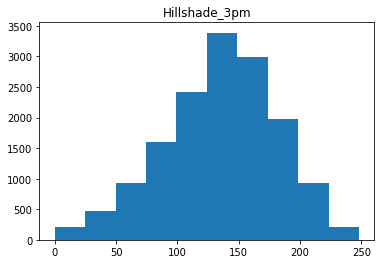

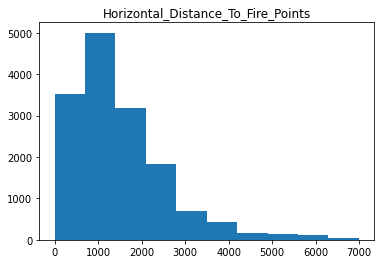

In [9]:
# for loop runs through all of the numeric variables and displays histograms for them all

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

## Correlation Matrices  
Understand correlations between variables  

In [10]:
# Prints a correlation matrix that shows how variables correlate with each other.
print(df_num.corr())

                                    Elevation    Aspect     Slope  \
Elevation                            1.000000 -0.011096 -0.312640   
Aspect                              -0.011096  1.000000  0.028148   
Slope                               -0.312640  0.028148  1.000000   
Horizontal_Distance_To_Hydrology     0.412712  0.040732 -0.055976   
Vertical_Distance_To_Hydrology       0.122092  0.056412  0.265314   
Horizontal_Distance_To_Roadways      0.578659  0.066184 -0.277049   
Hillshade_9am                        0.097900 -0.593997 -0.200072   
Hillshade_Noon                       0.215782  0.324912 -0.612613   
Hillshade_3pm                        0.089518  0.635022 -0.326887   
Horizontal_Distance_To_Fire_Points   0.443563 -0.052169 -0.239527   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.412712   
Aspect                                                      0.040732   
Slope                   

<AxesSubplot:>

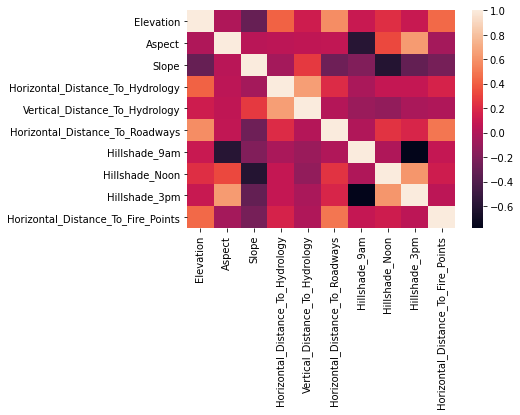

In [11]:
# Print a heatmap representation of the above correlation matrix
sns.heatmap(df_num.corr())

**Interpretation of degrees of correlation:**

Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).

High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.

Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.

Low degree: When the value lies below + .29, then it is said to be a small correlation.

No correlation: When the value is zero.

## Pivot Table  
View average values numerically

In [12]:
#Get the average numerical attributes of the cover types
pd.pivot_table(training, index = 'Cover_Type', values = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
                                                         'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points'])

,Aspect,Elevation,Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Slope,Vertical_Distance_To_Hydrology
Cover_Type,,,,,,,,,,
1,159.463426,3128.025926,144.065741,211.690278,223.248611,1994.412963,271.507407,2579.715741,13.112963,41.281481
2,151.097222,2922.540278,142.950926,214.044444,225.369907,2155.277315,287.728704,2425.791667,13.423611,47.337963
3,173.672685,2398.423148,141.549537,201.655556,216.561111,916.909722,210.723148,969.595833,20.628704,64.081944
4,138.099537,2223.420370,111.808796,227.968056,216.889815,860.540741,104.537500,915.100463,18.468519,40.143519
5,137.992130,2786.801389,121.392593,223.368981,218.317130,1530.388889,208.873148,1329.318519,16.724537,50.871296
6,180.617130,2423.276852,147.682407,193.562963,209.960648,1057.654167,160.095370,1064.980556,18.986111,44.873611
7,155.794444,3362.769907,136.193981,216.639815,222.412037,2062.847222,346.904630,2713.659722,14.166667,68.945833


## Barplots  
Vizualize average numerical values 

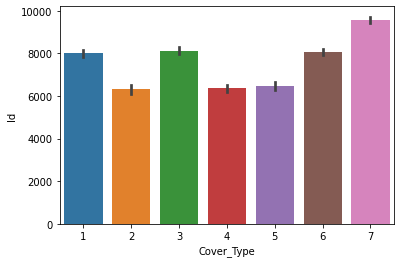

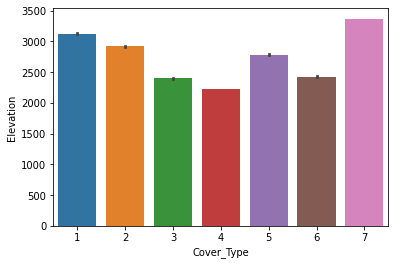

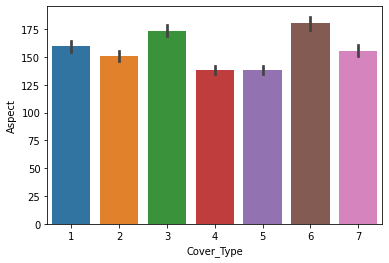

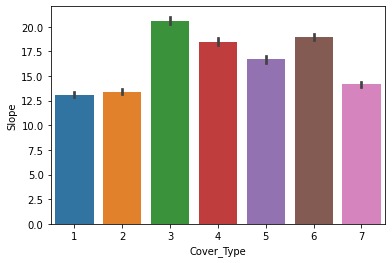

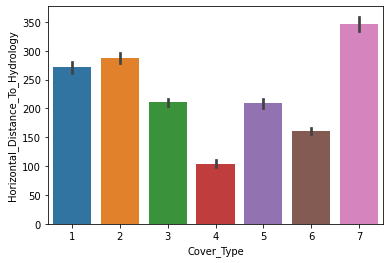

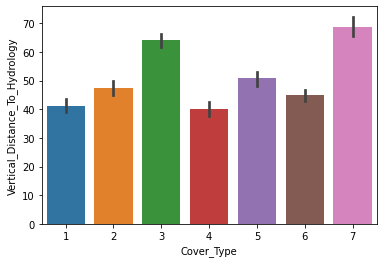

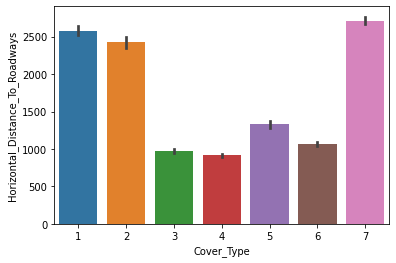

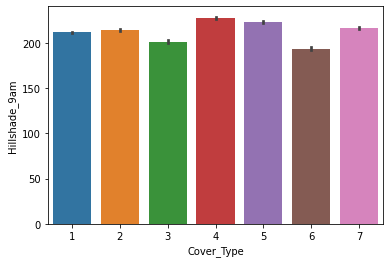

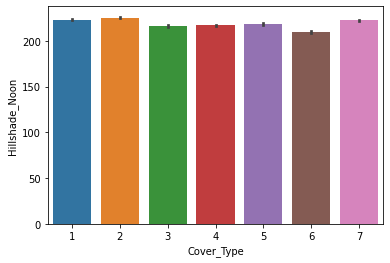

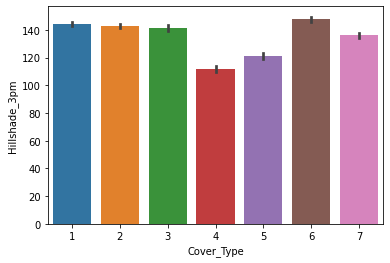

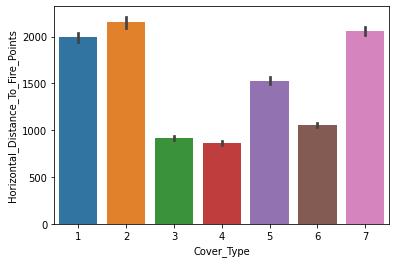

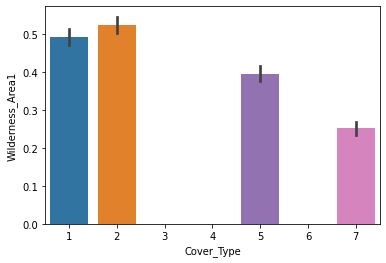

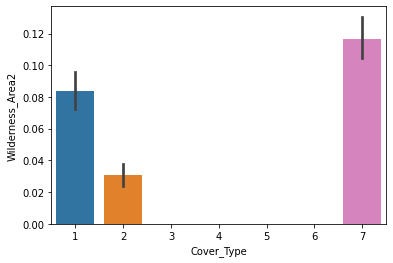

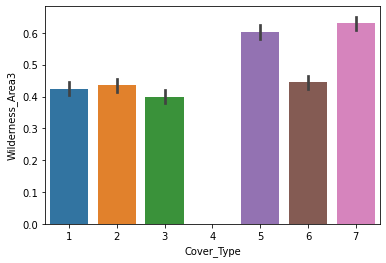

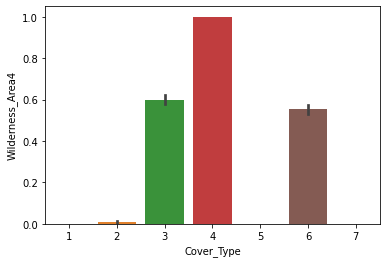

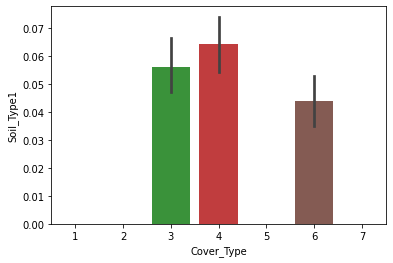

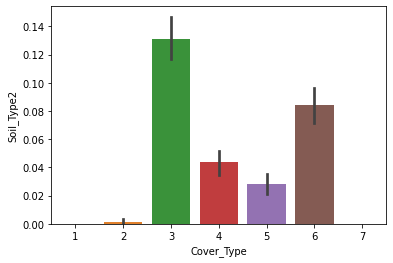

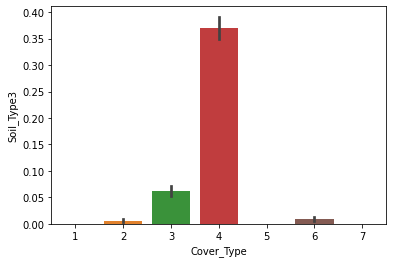

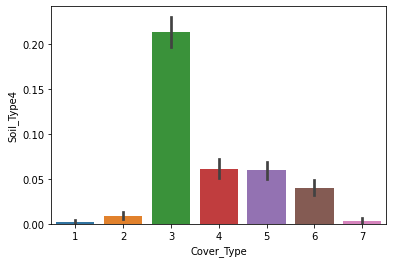

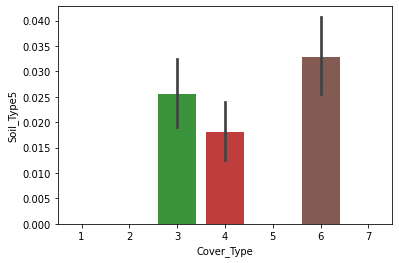

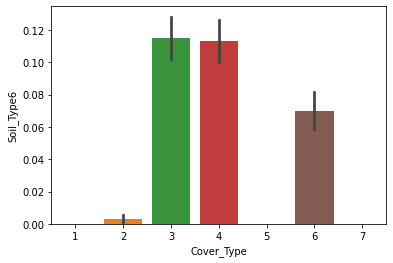

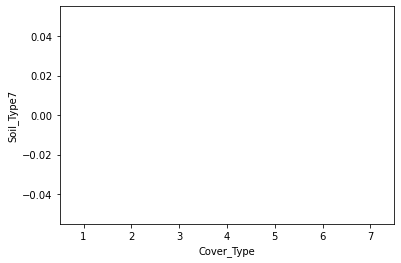

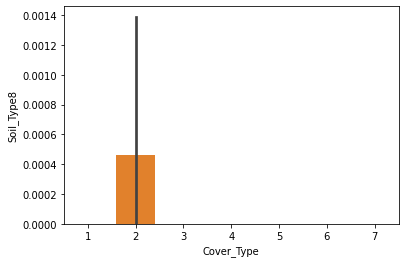

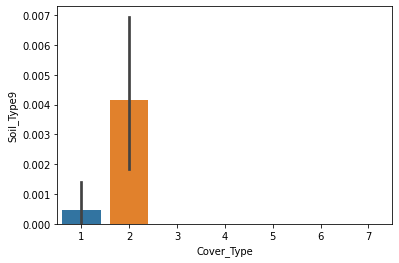

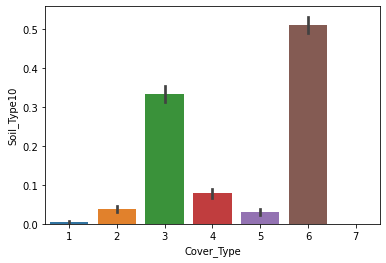

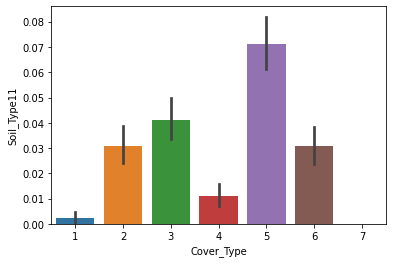

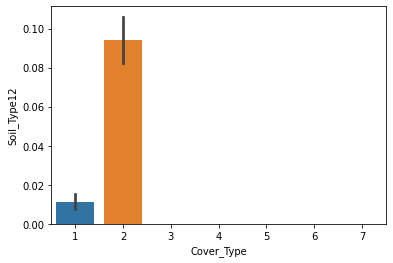

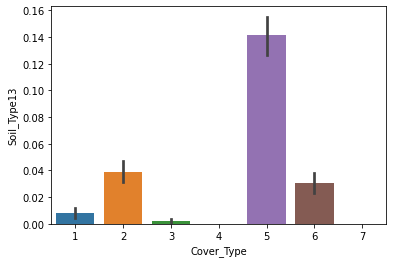

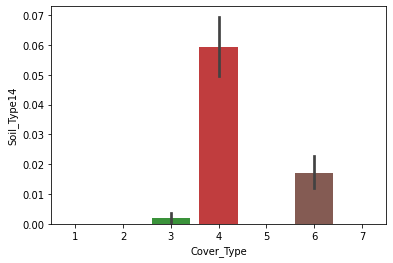

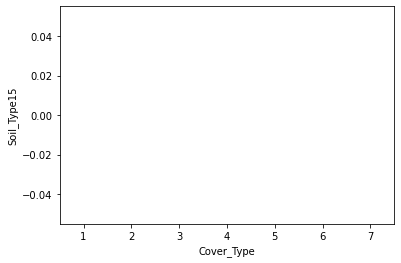

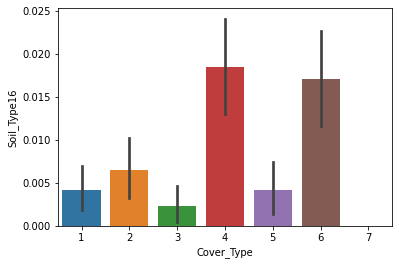

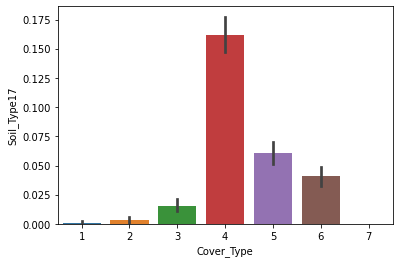

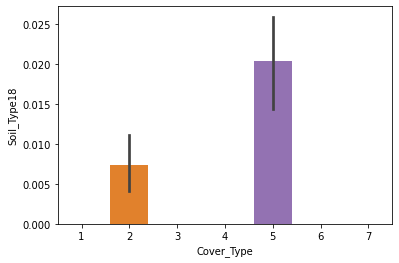

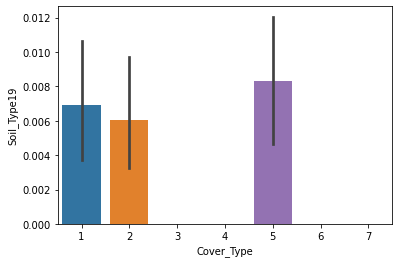

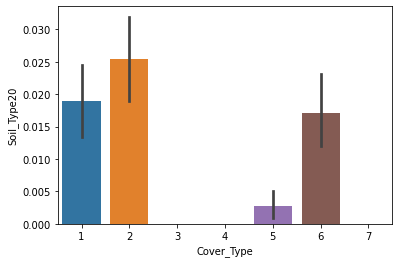

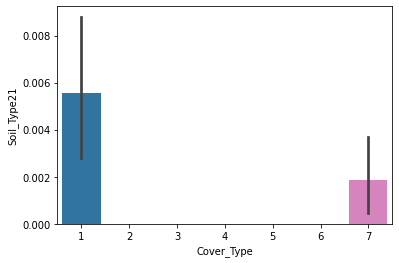

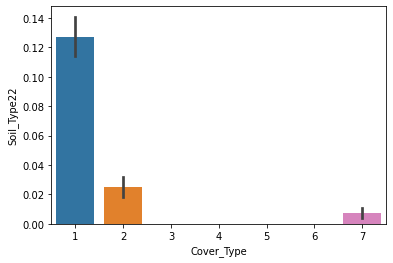

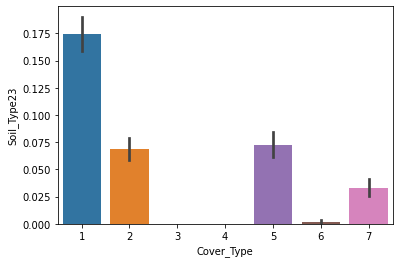

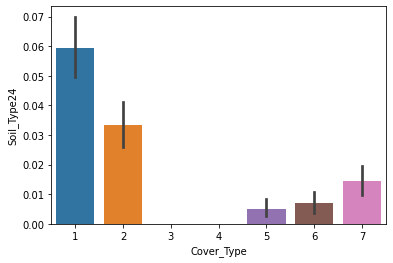

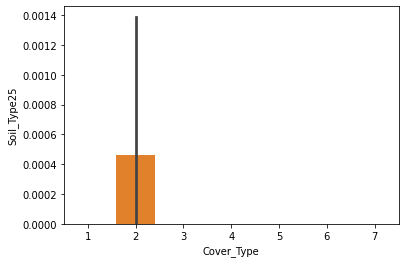

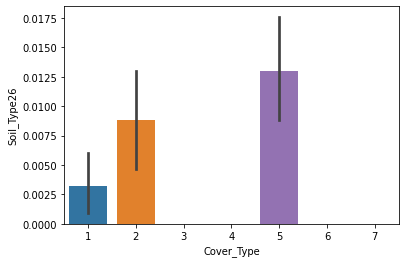

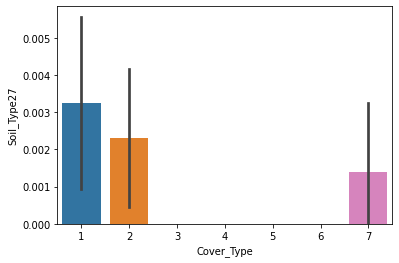

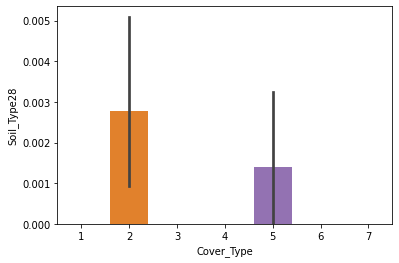

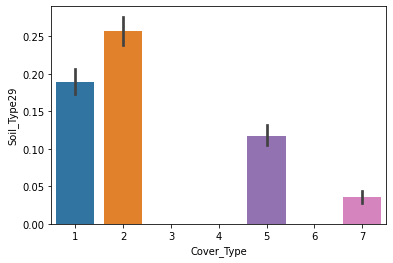

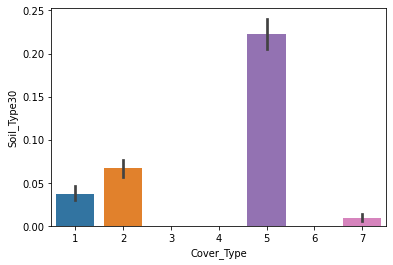

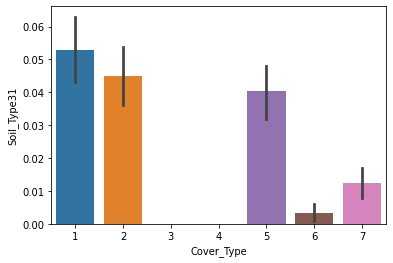

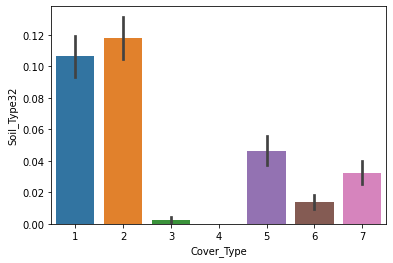

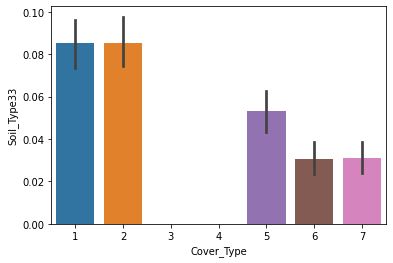

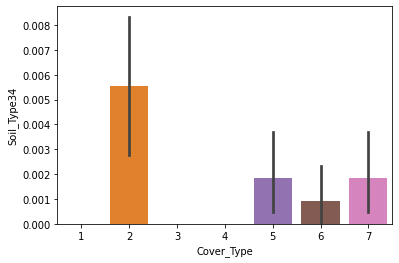

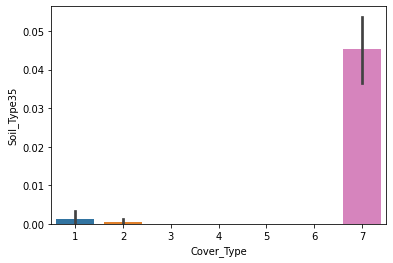

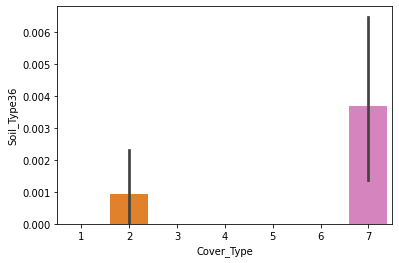

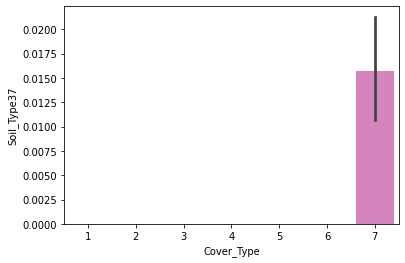

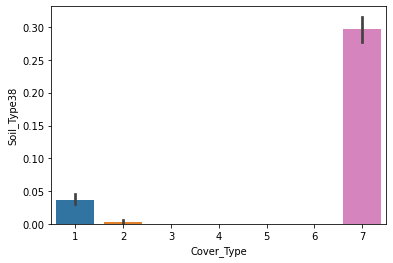

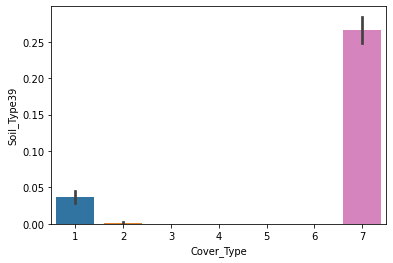

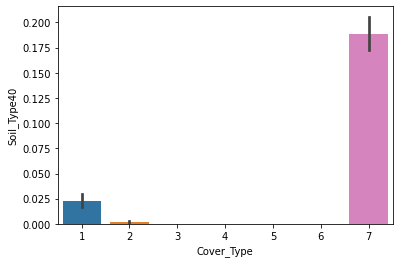

In [13]:
# Visualize the interesting numerical attributes based on their average value
    # We will visualize all the attributes using Bar plots
        # Black tips on bars are error bars- show variability of data (standard devation)

#names of all the attributes 
cols = training.columns

#number of attributes (exclude target)
size = len(cols)-1

#x-axis has target attribute to distinguish between classes
x = cols[size]

#y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    sns.barplot(x=x, y=y[i], data=training)
    plt.show()

## Violin Plots  
See the relationship between categorical variables (cover type) and other forest attributes. 

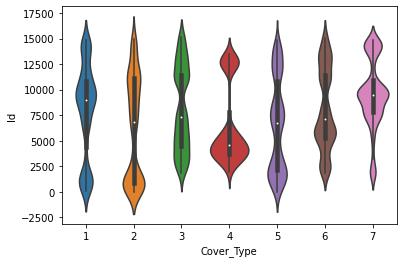

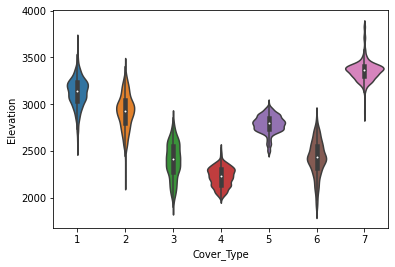

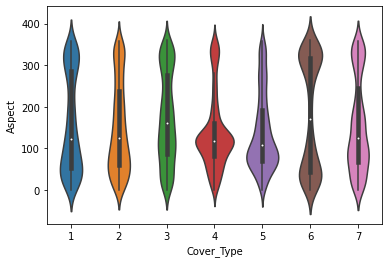

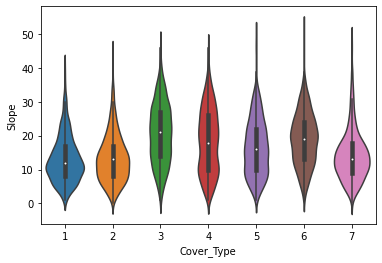

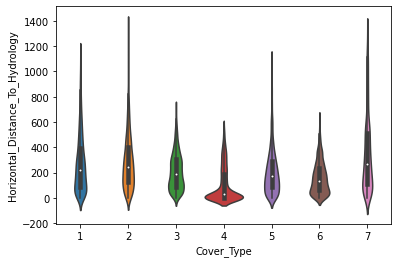

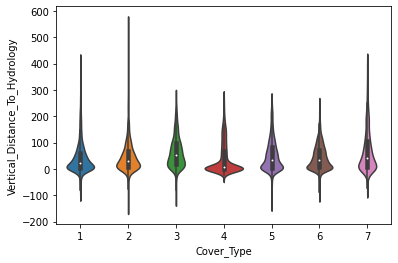

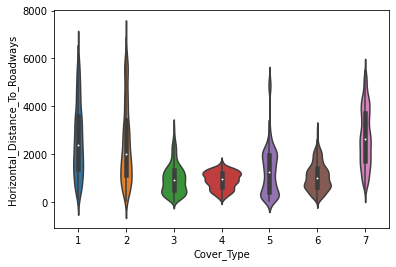

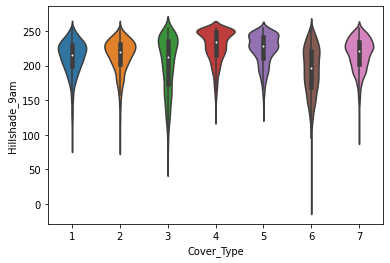

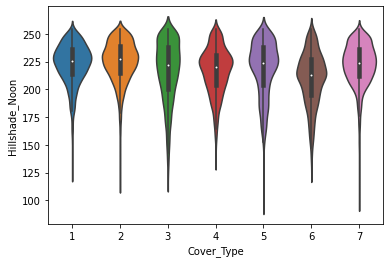

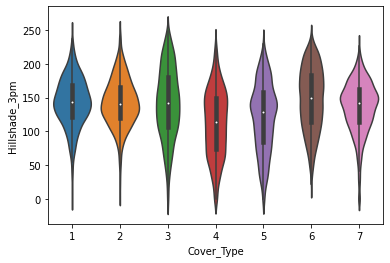

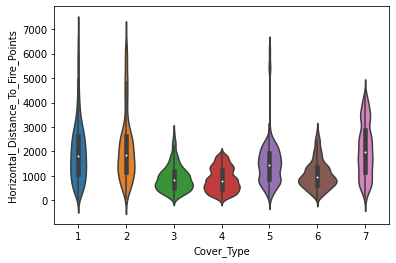

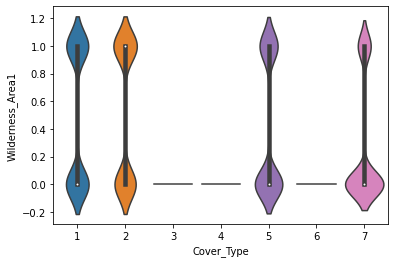

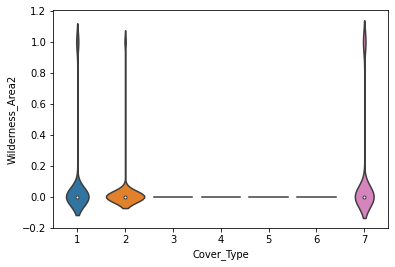

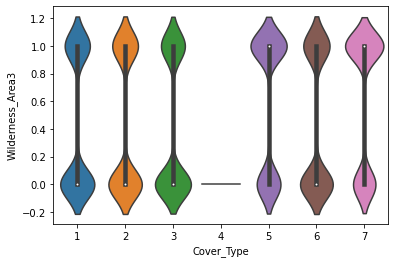

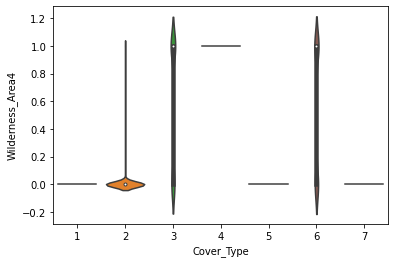

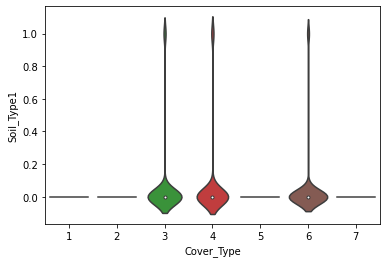

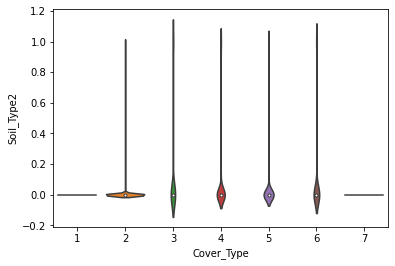

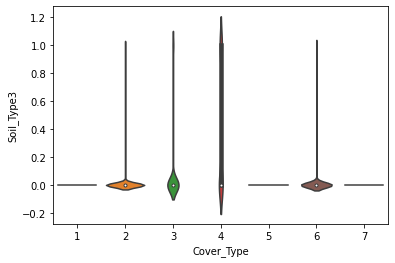

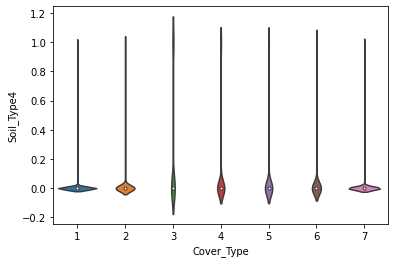

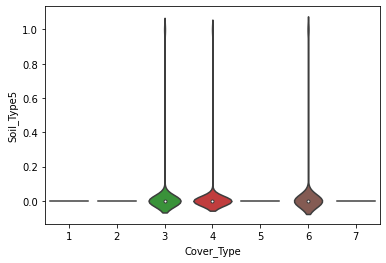

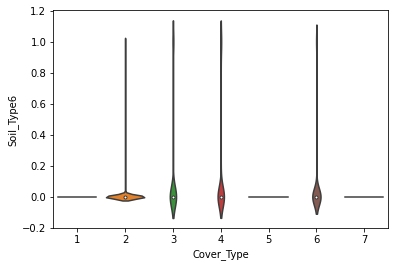

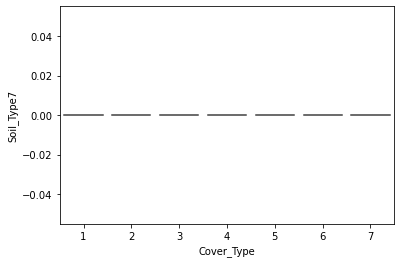

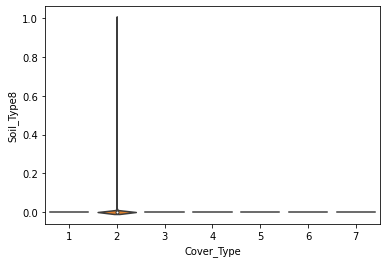

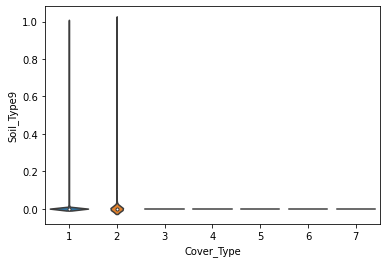

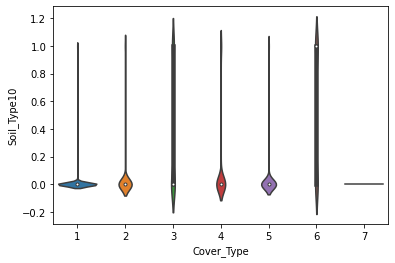

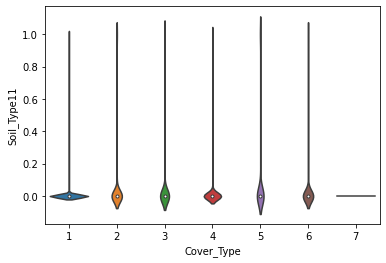

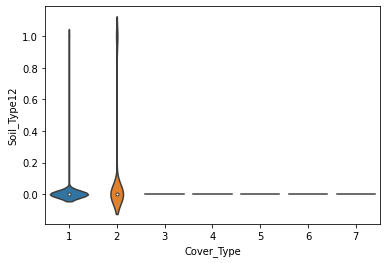

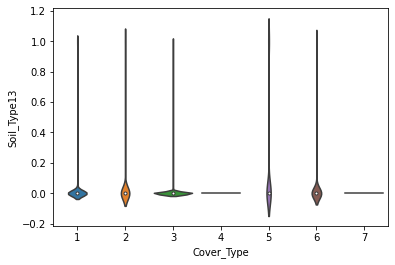

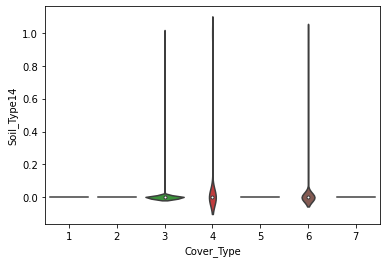

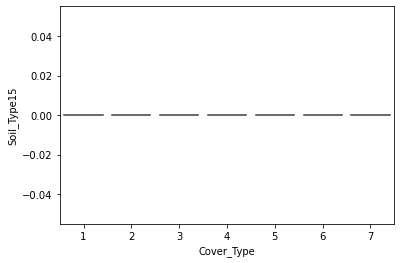

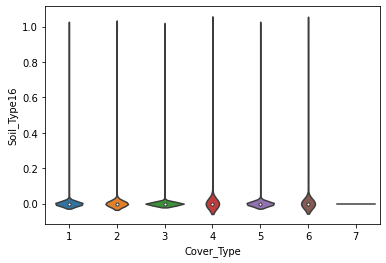

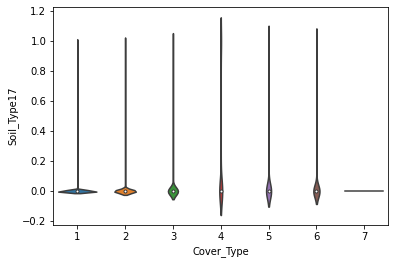

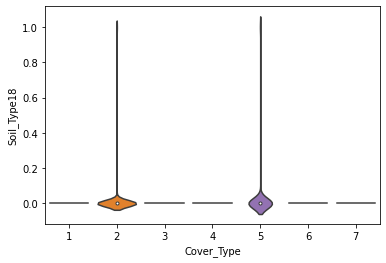

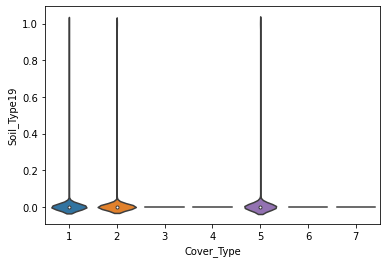

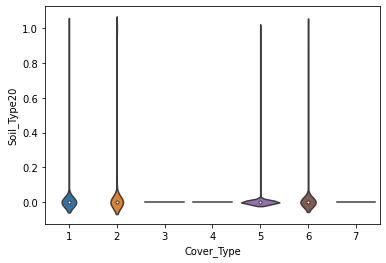

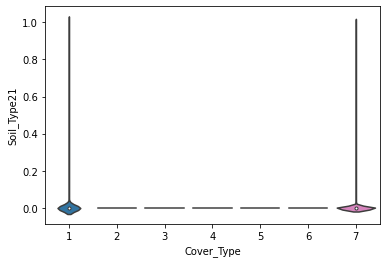

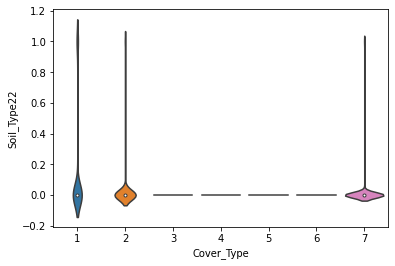

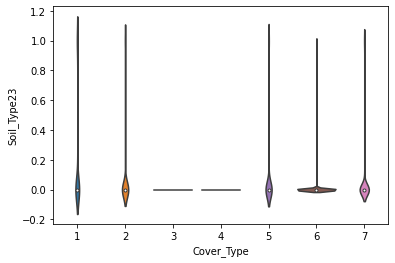

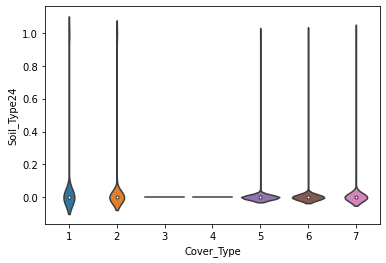

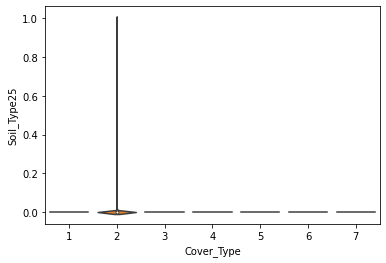

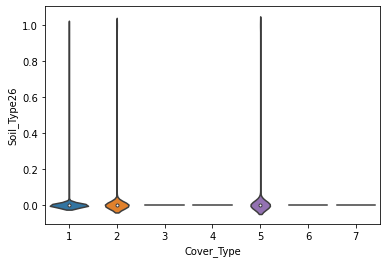

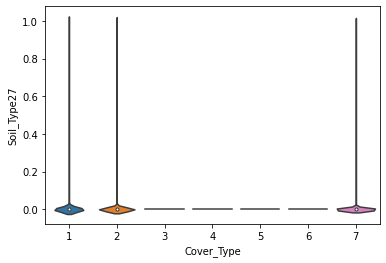

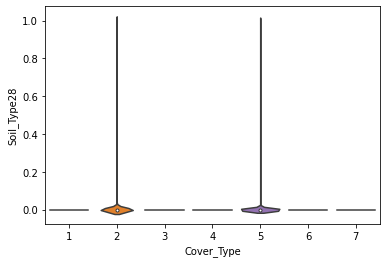

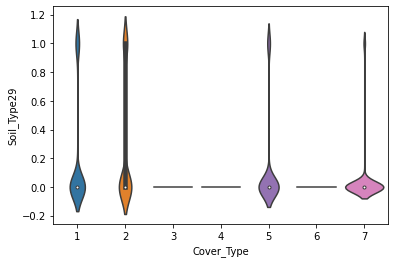

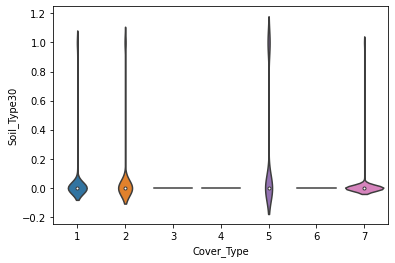

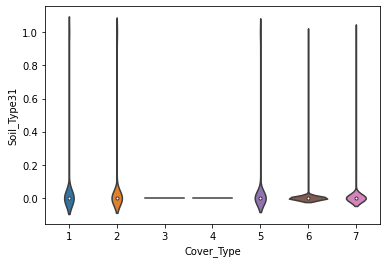

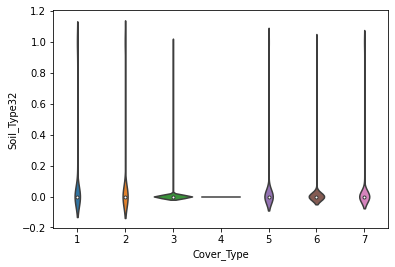

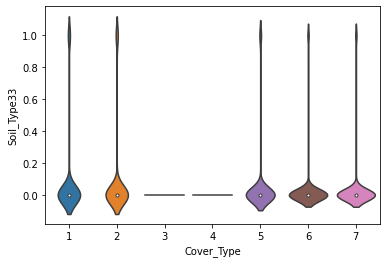

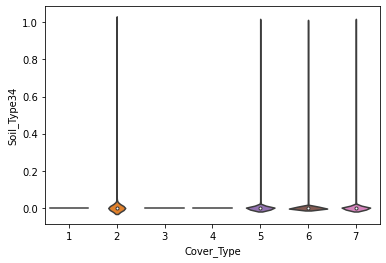

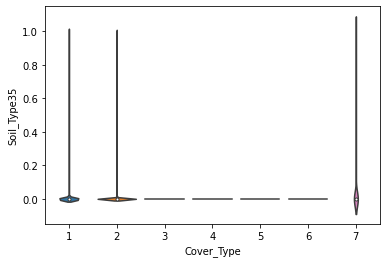

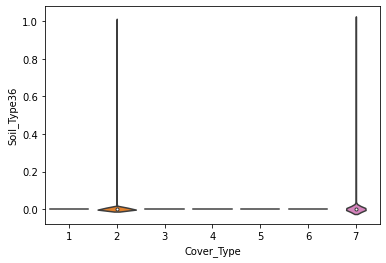

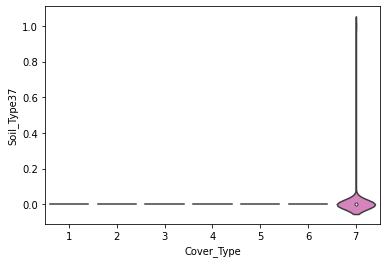

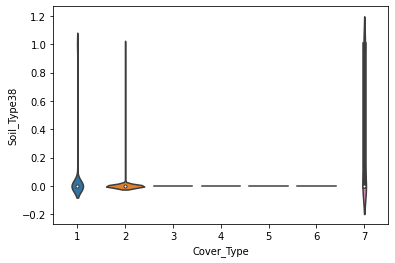

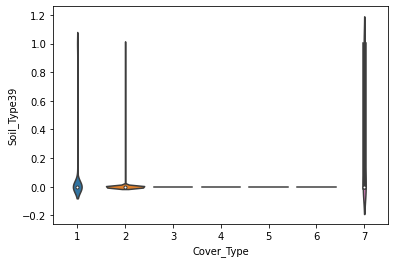

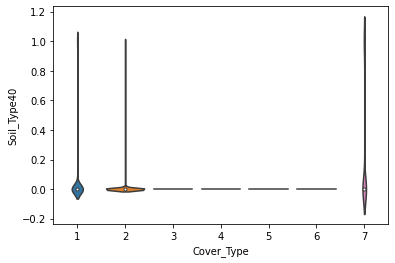

In [14]:
# We will visualize all the attributes using Violin Plot - a combination of box and density plots

#names of all the attributes 
cols = training.columns

#number of attributes (exclude target)
size = len(cols)-1

#x-axis has target attribute to distinguish between classes
x = cols[size]

#y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    sns.violinplot(data=training,x=x,y=y[i])  
    plt.show()

# Elevation is strongly correlated with Cover_Type
#Aspect contains a couple of normal distribution for several classes
#Horizontal distance to road, fire points hydrology have similar distribution
#Hillshade 9am and 12pm display left skew
#Hillshade 3pm is normal
#Lots of 0s in vertical distance to hydrology


## Scatterplots  
Visualize horizontal distance to hydrology by elevation by cover type    

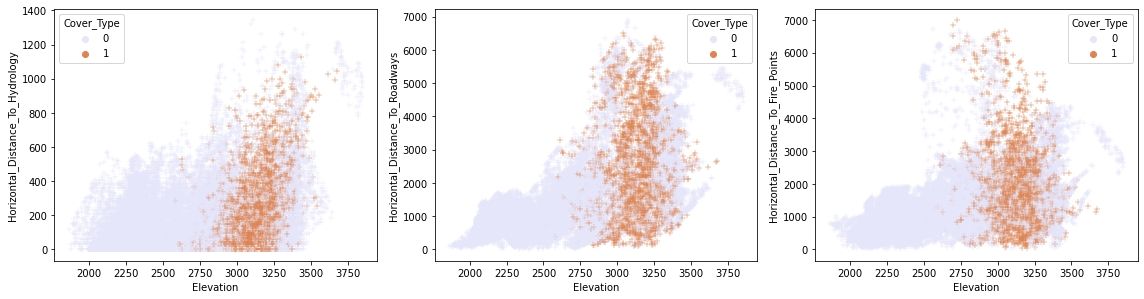

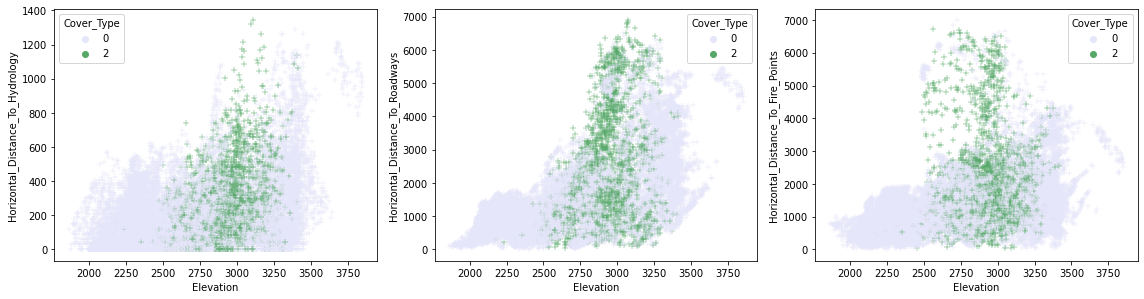

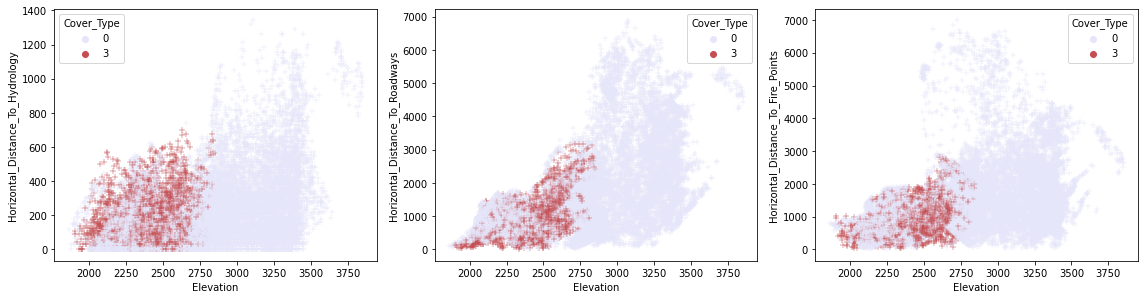

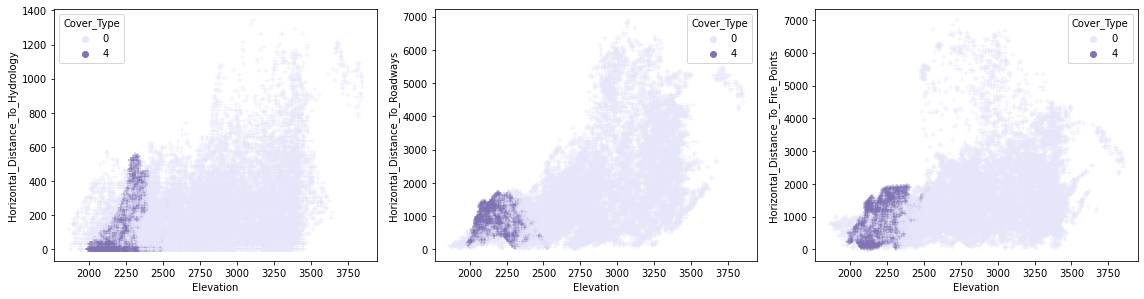

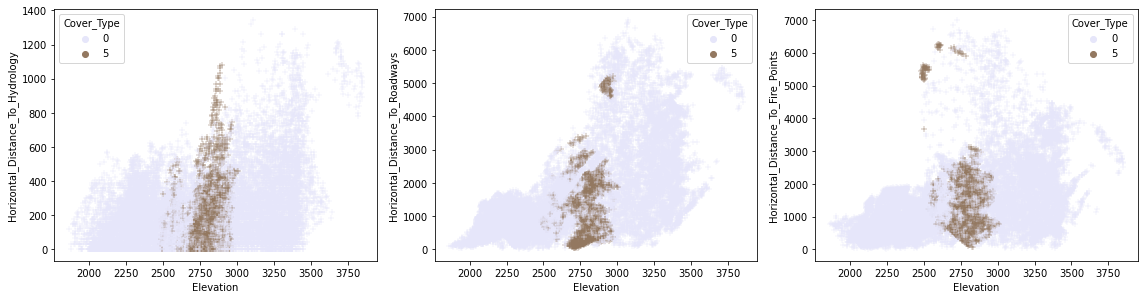

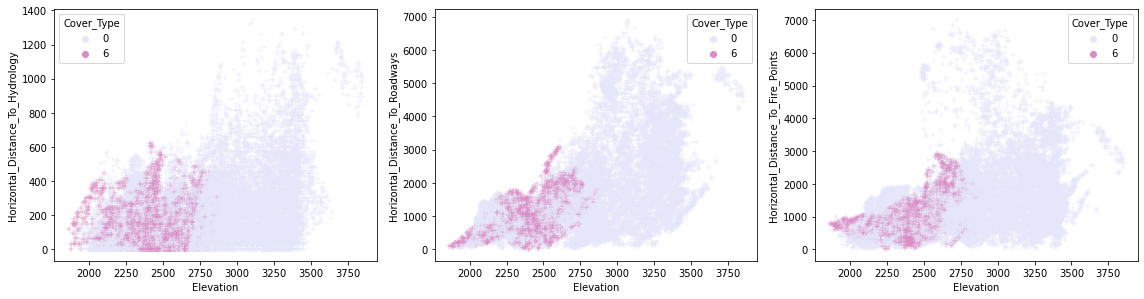

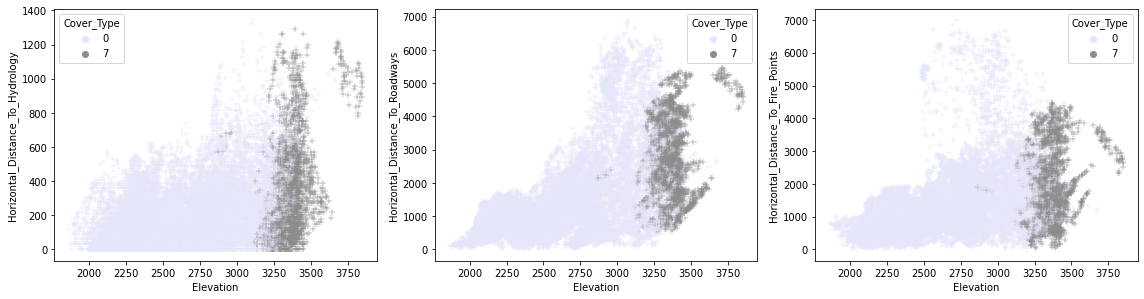

In [15]:
# Make array 'plot_features' with Horizontal Distance columns

plot_features = ['Horizontal_Distance_To_Hydrology', 
                 'Horizontal_Distance_To_Roadways', 
                 'Horizontal_Distance_To_Fire_Points']

# pick a Seaborn color pallete
colors = sns.color_palette('deep')

# Make a copy of the training data
sample = training.copy()

#Set up a for loop

#Loop through Cover values 1-6
for cover in [1,2,3,4,5,6,7]:
    
    # Rest = every element in the list except for the current cover element
    rest = list(set([1,2,3,4,5,6,7]) - set([cover]))
    
    # Copy Cover_Type from training set
    sample['Cover_Type'] = training['Cover_Type'].copy()
    
    # Set every value from the "rest" list to 0
    sample['Cover_Type'] = sample['Cover_Type'].replace(rest, 0)
    
    # create a figure object
    fig = plt.figure(figsize=(16, 12))
    #Choose colors
    palette = ['lavender', colors[cover]]
    
    # For loop to create scatterplots
    
    #Loops 1-3 because we are trying to show 3 Horizontal distances
    for i in range(3):
        
        # The first (3,3) defines the setup of the subpl0t
        # i+1 loops through all of the i values, which will loop through the 3 elements in plot_features(Horizontal Distances)
        fig.add_subplot(3, 3, i+1)
        
        # X axis = elevation
        # Y axis is a loop through the Horizontal distances
        # data= our new sample
        # Hue = the Cover type for this given loop
        # Marker = what is on the scatterplot (+ is a little + on it)
        # palette = the colors we picked above
        
        ax = sns.scatterplot(x='Elevation', 
                             y=plot_features[i], 
                             data=sample, 
                             hue='Cover_Type',
                             marker='+',
                             palette=palette)
    #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
    plt.tight_layout()
    plt.show()

## Countplots  
Relate categorical variables:    
            a. Cover type by wilderness area  
            b. Cover type by soil type

In [16]:
# Quick for loop to get numbered list of columns for use below
for col in training.columns:
    print(training.columns.get_loc(col),col)     

0 Id
1 Elevation
2 Aspect
3 Slope
4 Horizontal_Distance_To_Hydrology
5 Vertical_Distance_To_Hydrology
6 Horizontal_Distance_To_Roadways
7 Hillshade_9am
8 Hillshade_Noon
9 Hillshade_3pm
10 Horizontal_Distance_To_Fire_Points
11 Wilderness_Area1
12 Wilderness_Area2
13 Wilderness_Area3
14 Wilderness_Area4
15 Soil_Type1
16 Soil_Type2
17 Soil_Type3
18 Soil_Type4
19 Soil_Type5
20 Soil_Type6
21 Soil_Type7
22 Soil_Type8
23 Soil_Type9
24 Soil_Type10
25 Soil_Type11
26 Soil_Type12
27 Soil_Type13
28 Soil_Type14
29 Soil_Type15
30 Soil_Type16
31 Soil_Type17
32 Soil_Type18
33 Soil_Type19
34 Soil_Type20
35 Soil_Type21
36 Soil_Type22
37 Soil_Type23
38 Soil_Type24
39 Soil_Type25
40 Soil_Type26
41 Soil_Type27
42 Soil_Type28
43 Soil_Type29
44 Soil_Type30
45 Soil_Type31
46 Soil_Type32
47 Soil_Type33
48 Soil_Type34
49 Soil_Type35
50 Soil_Type36
51 Soil_Type37
52 Soil_Type38
53 Soil_Type39
54 Soil_Type40
55 Cover_Type


In [17]:
# Group one-hot encoded variables of a category into one single variable
    # One hot encoded variables are representations of categorical variables as binary vectors
        # For example, Wilderness_Area is represented as a binary vector in 4 columns for each of the 4 wilderness areas


#names of all the columns
cols = training.columns

# Training.shape returns an array of number of rows, number of columns
    # So number of rows=r , number of columns=c
r,c = training.shape

#Create a new dataframe with r rows, one column for each encoded category, and target in the end

data = pd.DataFrame(index=np.arange(0, r),columns=['Wilderness_Area','Soil_Type','Cover_Type'])

# We now have an empty dataframe with rows= number of rows in Training and a column for each of our 
data

,Wilderness_Area,Soil_Type,Cover_Type
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
15115,NaN,NaN,NaN
15116,NaN,NaN,NaN
15117,NaN,NaN,NaN
15118,NaN,NaN,NaN


In [18]:
#Make an entry in 'data' for each r as category_id, target value

# For loop in range (0 up to the number of rows in 'Data'- which is 15,120)
    # Range (0,15120) is actually 0-15119

for i in range(0,r):
    w=0;
    s=0;
    
    # Category1 range - FInd Wilderness area
        # 10-13 Is the column of the first wilderness area through the column of the first soil type 
            # Range (10,14) is actually the numbers 10-13 
            
    for j in range(10,14):
        
        # (training.iloc[row,column] returns the value at the row, column location. 
            #So if there is a 1 at this location that means this row has a binary "yes" identifying it as being from that wilderness location
            # For example, training.iloc[i,j] will evaluate to 1 if i= 5 and j=10, and at that "cell (5,10)" the binary identifier is yes
                # column 10 is Wilderness area 1
            # So once we evaluate to yes, we move onto the steps below the if statements
            
        if (training.iloc[i,j] == 1):
            
            # W is going to be our wilderness location when we input below 
                # So, using the above example (i=5, j=10), wilderness area would be set to 10-9 =1. 
                # w =1
                     # If the area in row 5 had been of Wilderness Area 2, it would have looped through once more. 
                        # So J would have equaled 11.
                            # W would have equaled (11-9)=2
                        
            w=j-9  # Wilderness Area input. 10-9=1
            
            # now we have a W value, so we stop the loop for finding wilderness area for this given row and move on to find soil type
            break
            
    # Category2 range   
        # 14-54 is the column of the first soil type through the column of the last soil type 
              # Range (14,54) is actually the numbers 14-53
                # If you look above to the numbered for loop column list, 53 is the last soil column
            
    for k in range(14,54):
        
         # (training.iloc[row,column] returns the value at the row, column location. 
            #So if there is a 1 at this location that means this row has a binary "yes" identifying it as being of that soil
            # For example, training.iloc[i,k] will evaluate to 1 if i= 5 and k=43, and at that "cell (5,43)" the binary identifier is yes
                # column 43 is soil type 30
            # So once we evaluate to yes, we move onto the steps below the if statements
            
        if (training.iloc[i,k] == 1):
            
                # S is going to be our wilderness location when we input below 
                # So, using the above example (i=5, k=43), wilderness area would be set to 43-13 =30. 
                # s = 30
                     # If the area in row 5 had been of Soil Type 31, it would have looped through once more. 
                        # So k would have equaled 44.
                            # S would have equaled (44-13)=31
            
            s=k-13 # Soil Type input. 43-13=30
            
            # now we have a S value, so we stop the loop for finding Soil Type for this given row and move on to input the values
            break
    
    
    # Make an entry in 'data' for each r
    
        # Set the row i = 5 to a 3 element array that fills in the 3 empty columns in the 'data' table.
            # 3 elements are wilderness area, soil type, and Cover type
        
        # i is the row in question - 5 in this example
        # w is the wilderness area - (10-9)=1 in this example 
        #S is the soil type - (43-13) = 30 in this example 
        #training.iloc[i,c-1] is the cover type
            #Cover type is not broken out into one hot encoded variables so we can just index it by using training.iloc
                # i = the row in question, 5 in this example
                # c - 1 gets us the last row of the training set
                
          
    data.iloc[i]=[w,s,training.iloc[i,c-1]]

In [19]:
# Now our data table is populated
data

,Wilderness_Area,Soil_Type,Cover_Type
0,2,30,5
1,2,30,5
2,2,13,2
3,2,31,2
4,2,30,5
...,...,...,...
15115,4,5,3
15116,4,5,3
15117,4,5,3
15118,4,5,3


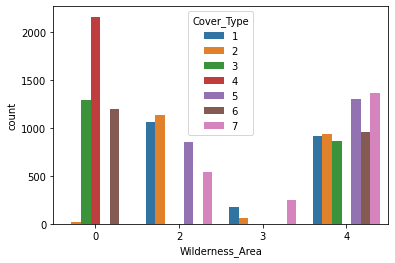

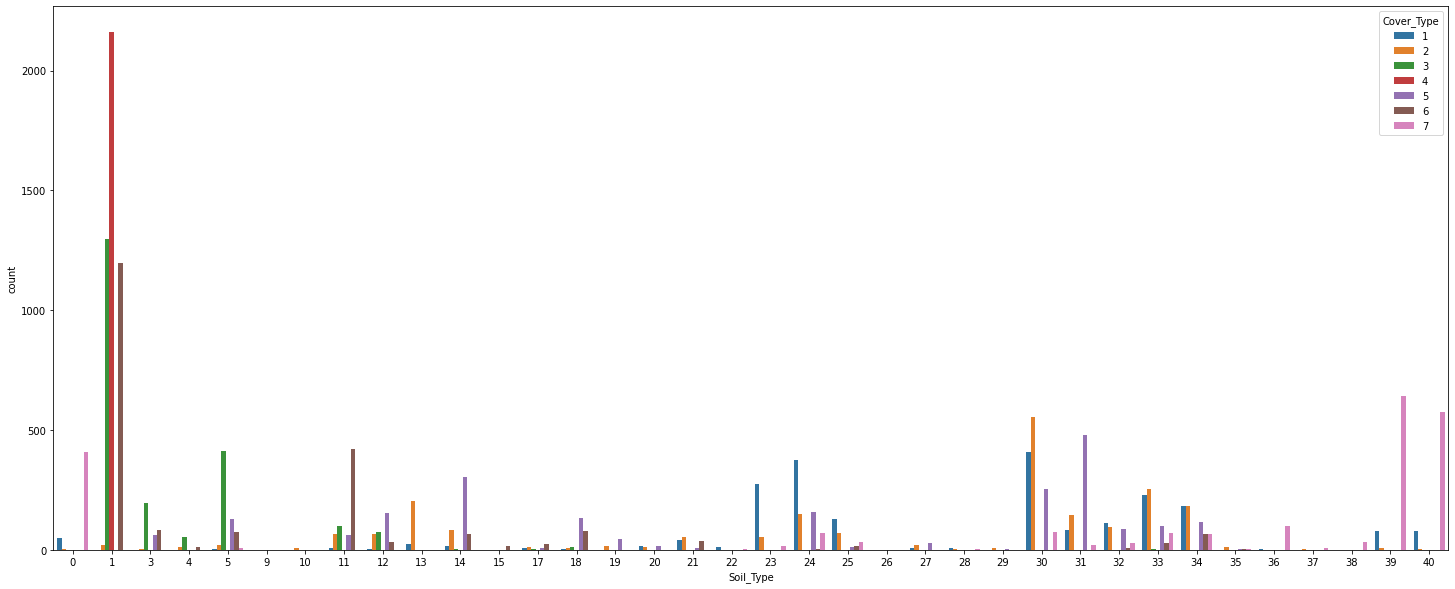

In [20]:
#Plot for Wilderness Area  
sns.countplot(x="Wilderness_Area", hue="Cover_Type", data=data)
plt.show()

#Plot for Soil Type
plt.rc("figure", figsize=(25, 10))
sns.countplot(x="Soil_Type", hue="Cover_Type", data=data)
plt.show()

# right-click and open the image in a new window for larger size 

WildernessArea_4 has a lot of presence for cover_type 4. Good class distinction  

WildernessArea_3 has very litte class distinction  

Soil Types **1-6, 10-14, 17, 22-23, 29-33, 35, and 38-40** offer significant class distinction as counts for some are very high

## Review and Future Work  

In this notebook, we used data visualization to gain an understanding of a large dataset of information about forests.   
In the future, we could leverage this understanding to build a classification model that predicts forest cover type by using the other columns of the dataset.  

Thank you for reading!